# Use Tags for convert 

Using `tags` for cells, we can simply filter, hide, or color cells with a specific tag. In this notebook, we try to tag certain cells according to their *difficulty*.  
We use the tags `easy` `medium` and `hard` for coloring parts of the notebook accordingly.  

This notebook is generated following this [tutorial](https://nbconvert.readthedocs.io/en/latest/customizing.html).

In [1]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# sine interactive
def f(amp, freq):
    plt.figure(2)
    x = np.linspace(0, 4*np.pi, num=1000)
    plt.plot(x, np.sin(freq*x)*amp)
    plt.ylim(-5, 5)
    plt.show()
interactive_plot = interactive(f, amp=(0, 5.0), freq=(1, 5, 0.1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=2.5, description='amp', max=5.0), FloatSlider(value=3.0, description='…

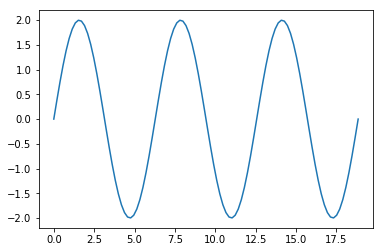

In [3]:
# sine program it
def f(x, amp, freq):
    """
    write a sine function with amplitude and frequency
    """
    ### BEGIN SOLUTION
    y = amp * np.sin(x*freq)
    return y
    ### END SOLUTION

x = np.linspace(0,6*np.pi, 100)
y = f(x, 2, 1)
plt.plot(x,y)

In [4]:
# program it all yourself..

With the file written below, when we use the following nbconvert command (in the command line), we will get an html file with colored cells.   
        ```jupyter nbconvert --to html 'example.ipynb' --template=mytemplate.tpl```
        
Alternatively, we can run the cells below to execute this command from a jupyter notebook.

In [5]:
%%writefile mytemplate.tpl

{% extends 'full.tpl'%}
{% block any_cell %}
{% if 'hard' in cell['metadata'].get('tags', []) %}
    <div class="alert alert-danger">
        {{ super() }}
    </div>
{% elif 'medium' in cell['metadata'].get('tags', []) %}
    <div class="alert alert-warning">
        {{ super() }}
    </div>
{% elif 'easy' in cell['metadata'].get('tags', []) %}
    <div class="alert alert-success">
        {{ super() }}
    </div>
{% else %}
    {{ super() }}
{% endif %}
{% endblock any_cell %}
                         

Overwriting mytemplate.tpl


In [6]:
example = !jupyter nbconvert --to html 'example.ipynb' --template=mytemplate.tpl --stdout
example = example[3:] # have to remove the first three lines which are not proper html
from IPython.display import HTML, display
display(HTML('\n'.join(example)))